## Clustering: Mall Customers Data using K-means

Consider the [Mall Customers Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python). The goal is to perform customer segmentation or clustering using K-means. 

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load Data
df = pd.read_csv('Mall_Customers.csv', index_col=0)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [4]:
# Check for missing data
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Drop Categorical data
df.drop(['Genre'], axis=1, inplace=True)
df.drop(['Age'], axis=1, inplace=True)
df.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [6]:
# Shuffle data
data = df.sample(frac=1)
data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
29,29,31
156,78,89
177,88,15
16,20,79
3,16,6


In [7]:
# Convert to numpy array
X = data.to_numpy()
X.shape

(200, 2)

**Part a**: Standardize the features to be in the range (0,1).

In [8]:
# Standardize the features to be in the range (0,1). See notebook of lecture 6.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.1147541 , 0.30612245],
       [0.51639344, 0.89795918],
       [0.59836066, 0.14285714],
       [0.04098361, 0.79591837],
       [0.00819672, 0.05102041],
       [0.51639344, 0.73469388],
       [0.59836066, 0.86734694],
       [0.36885246, 0.39795918],
       [0.47540984, 0.06122449],
       [0.31967213, 0.43877551],
       [0.31967213, 0.40816327],
       [0.31967213, 0.52040816],
       [0.49180328, 0.04081633],
       [0.59836066, 0.12244898],
       [0.20491803, 0.41836735],
       [0.18032787, 0.25510204],
       [0.48360656, 0.7244898 ],
       [0.67213115, 0.86734694],
       [0.35245902, 0.60204082],
       [0.51639344, 0.8877551 ],
       [0.39344262, 0.45918367],
       [0.10655738, 0.31632653],
       [0.42622951, 0.56122449],
       [0.45901639, 0.10204082],
       [0.3442623 , 0.58163265],
       [0.46721311, 0.71428571],
       [0.72131148, 0.85714286],
       [0.31967213, 0.47959184],
       [0.2704918 , 0.5       ],
       [0.45901639, 0.75510204],
       [0.

**Part b**: Search for ``optimal" number of clusters using the elbow method. 

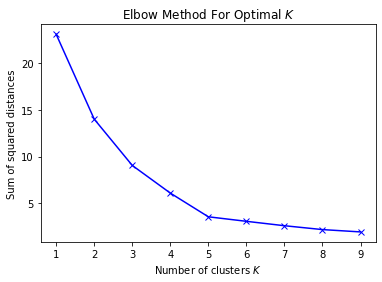

In [10]:
# Search for "optimal" number of clusters. See notebook of lecture 7.
SS_dist = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    SS_dist.append(kmeans.inertia_)
plt.plot(K,SS_dist,'bx-')
plt.xlabel('Number of clusters $K$') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal $K$')
plt.show()

**Part c**: Run K-Means with the ``optimal" number of clusters you found in part (b).

In [11]:
#Run K-Means
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [12]:
# Partition vector
Partition_vec = kmeans.labels_
Partition_vec

array([1, 2, 4, 3, 1, 2, 2, 0, 4, 0, 0, 0, 4, 4, 0, 1, 2, 2, 0, 2, 0, 1,
       0, 4, 0, 2, 2, 0, 0, 2, 4, 3, 1, 3, 0, 4, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 3, 0, 0, 2, 2, 0, 4, 3,
       2, 0, 0, 4, 3, 0, 0, 3, 3, 1, 0, 0, 4, 0, 0, 4, 3, 4, 1, 0, 3, 2,
       1, 1, 3, 2, 0, 2, 4, 2, 0, 2, 3, 2, 2, 1, 4, 4, 2, 2, 4, 0, 0, 2,
       3, 2, 0, 2, 3, 4, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 4, 2,
       0, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 4, 0, 0, 3, 4, 4, 0, 4, 0, 3, 2, 0, 4, 1, 4, 3, 4, 0, 2, 1, 2,
       0, 3, 4, 3, 1, 3, 0, 0, 1, 0, 4, 3, 2, 4, 4, 4, 0, 0, 0, 2, 0, 3,
       4, 4], dtype=int32)

In [13]:
# Centroids
centers = kmeans.cluster_centers_
centers

array([[0.33029751, 0.49508692],
       [0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.6       , 0.16443149]])

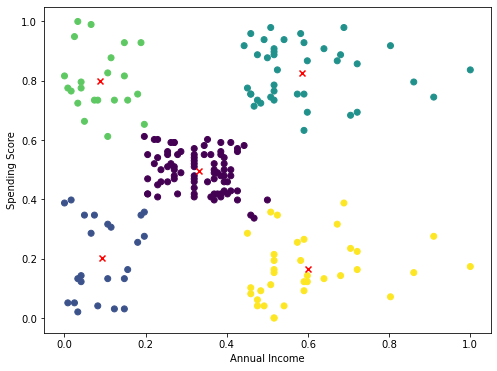

In [14]:
# Let's view our results
plt.figure(figsize=(8, 6))

plt.scatter(X[:,0], X[:,1], c=Partition_vec)

plt.scatter(centers[:,0], centers[:,1], color='red', marker='x') 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.show()

**Part d**: Suppose you have a new customer with income 75k$ and spending score 38. Based on K-means algorithm, explain how you would determine which cluster the new data point belongs to. Justify your answer.

In this case, we'd first have to standardize the \\$75k income and 38 spending score as this is what we did for the rest of the data points. Then we would plot the point and classify it based on which centroid it was closest to because k-means has classified the other data points into clusters where the points closest to a certain centroid are part of the same cluster.

**Part e**: Plot this new data point on the scatter plot.

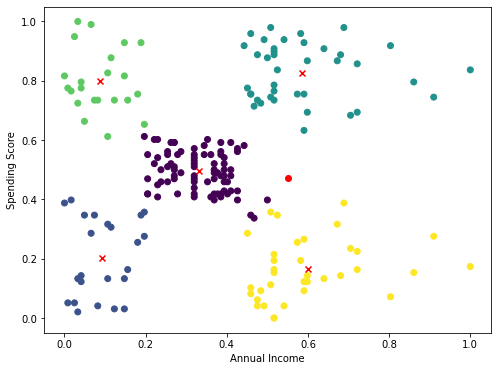

In [26]:
plt.figure(figsize=(8, 6))

plt.scatter(X[:,0], X[:,1], c=Partition_vec)

plt.scatter(centers[:,0], centers[:,1], color='red', marker='x') 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.scatter(((75 - 60.56) / 26.264721) , (abs(38 - 50.2) / 25.823522), color='red')
plt.show()

**Part f**: Suppose instead of having only two features, we had 10 features to work with. Name one method you could use to visualize the clusters in $\mathbb R^2$ or $\mathbb R^3$.

You could use PCA to visualize the clusters in $\mathbb R^2$ or $\mathbb R^3$ because this could reduce the dimensions down to 2 or 3 while representing the same overall data